In [361]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Part 1 : Exploratory Data Analysis EDA

In [362]:
df = pd.read_csv("C:/Hamza/project kaggle/Customer_personality_analysis/data/marketing_campaign.csv", sep="\t")
pd.set_option('display.max_columns', None)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


## 1.1. First look at data

In [363]:
df.shape

(2240, 29)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [365]:
df.describe().style.background_gradient(cmap='Purples')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.000000,11.000000,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.000000,0.000000,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000


In [366]:
# checking duplicate and missing values
print("Duplicate : ", df.duplicated().sum())
print("NA values : ", df.isnull().sum()[df.isnull().sum() > 0])

Duplicate :  0
NA values :  Income    24
dtype: int64


<div style="background-color: #9370DB; color: #000000; padding: 10px;">
<span style="font-size: 28px;"> What did we learn</span><br>
- Dataset has 29 columns and 2240 line<br>
- We have 24 missing values in income that we have to take care of<br>
- 'Dt_customer' is actually an object, have to convert it to datetime<br>
- 'Z_CostContact' and 'Z_Revenue' always have the same values, it seem to be useless to keep them since they bring no info. Will delete them is preprocessing part<br>
</div>


## 1.2. Data cleaning / New columns

In [367]:
df.drop(['Z_CostContact', 'Z_Revenue', 'ID'], axis=1, inplace=True)

In [368]:
df[df['Income'].isnull()].head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0


We can either exclude them or replace do by the mean/median of the other line, since we still have a lot of data and they are not much we rather exclude them

In [369]:
df.dropna(inplace=True)
print("NA values : ", df.isnull().sum()[df.isnull().sum() > 0])

NA values :  Series([], dtype: int64)


Change Dt_Customer  to datetime

In [370]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = "%d-%m-%Y")
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

We can now get the first and last customer nrollment date with the company

In [371]:
print('first customer enrollment date: ', df['Dt_Customer'].min())
print('last customer enrollment date: ', df['Dt_Customer'].max())

first customer enrollment date:  2012-07-30 00:00:00
last customer enrollment date:  2014-06-29 00:00:00


Since we don't know when the data was taken, last assume that we are in 2015 to calculate customer's age using 'Year_Birth'

In [372]:
df['Age'] = 2015 - df['Year_Birth']
df['Age'].head()

0    58
1    61
2    50
3    31
4    34
Name: Age, dtype: int64

In [373]:
df.drop(['Year_Birth'], axis=1, inplace=True)

Data is way cleaner now, we can move on to some data vizualization

In [374]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61


<div style="background-color: #9370DB; color: #000000; padding: 10px;">
<span style="font-size: 28px;">What did we do</span><br>
- Delete 'Z_CostContact' and 'Z_Revenue' since we established they are not useful<br>
- Took care of missing values by deleting them<br>
- 'Dt_customer' has been converted to datetime<br>
- Created new column 'Age' to better understand people's Age<br>
</div>

## 1.3 Data vizualisation

First, lets create a function that allows us to separare continous and discrete features for the numerical features. It will be easier to make differentes plot with this split

In [375]:
def classify_numerical_features(df, threshold=10, excluded_feature=None):
    continuous_features = []
    discrete_features = []

    for column in df.columns: # select numerical features
        # Skip the excluded_feature
        if column == excluded_feature:
            continue
        
        unique_values = df[column].nunique() # count number of unique values in each columns
        if unique_values < threshold or ('Num' in column):
            discrete_features.append(column) 
        else: # if more thant 10 differents values, it is considered as a continuous feature
            continuous_features.append(column)

    return continuous_features, discrete_features

continuous, discrete = classify_numerical_features(df, excluded_feature='Dt_Customer')
print('Continuous features : ', continuous)
print('Discrete features : ', discrete)

Continuous features :  ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age']
Discrete features :  ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


In [376]:
df.head(20)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34
5,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,48
6,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,44
7,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,30
8,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,41
9,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,65


### 1.3.1 Continuous Features

We can see that most customerage is between 17 and 80

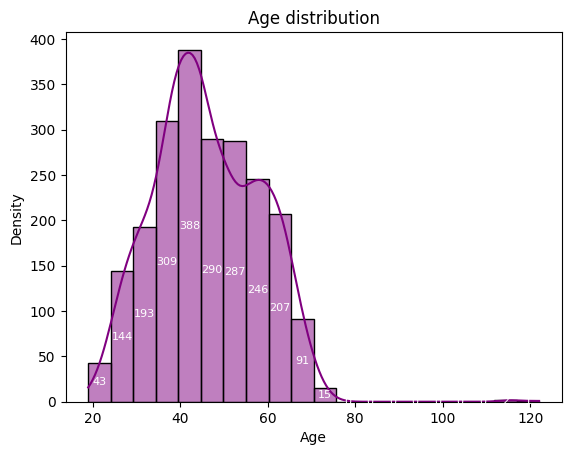

In [377]:
# Plot histogram with KDE
ax = sns.histplot(df['Age'], kde=True, color='purple', bins=20, fill=True)

# Add counts values to each bar
for p, Age in zip(ax.patches, df['Age'].value_counts().sort_index().index):
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center', fontsize=8, color='white')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age distribution')

# Show the plot
plt.show()

Lets first plot an histogram for each continuous feature to gain an initial insight into their distribution

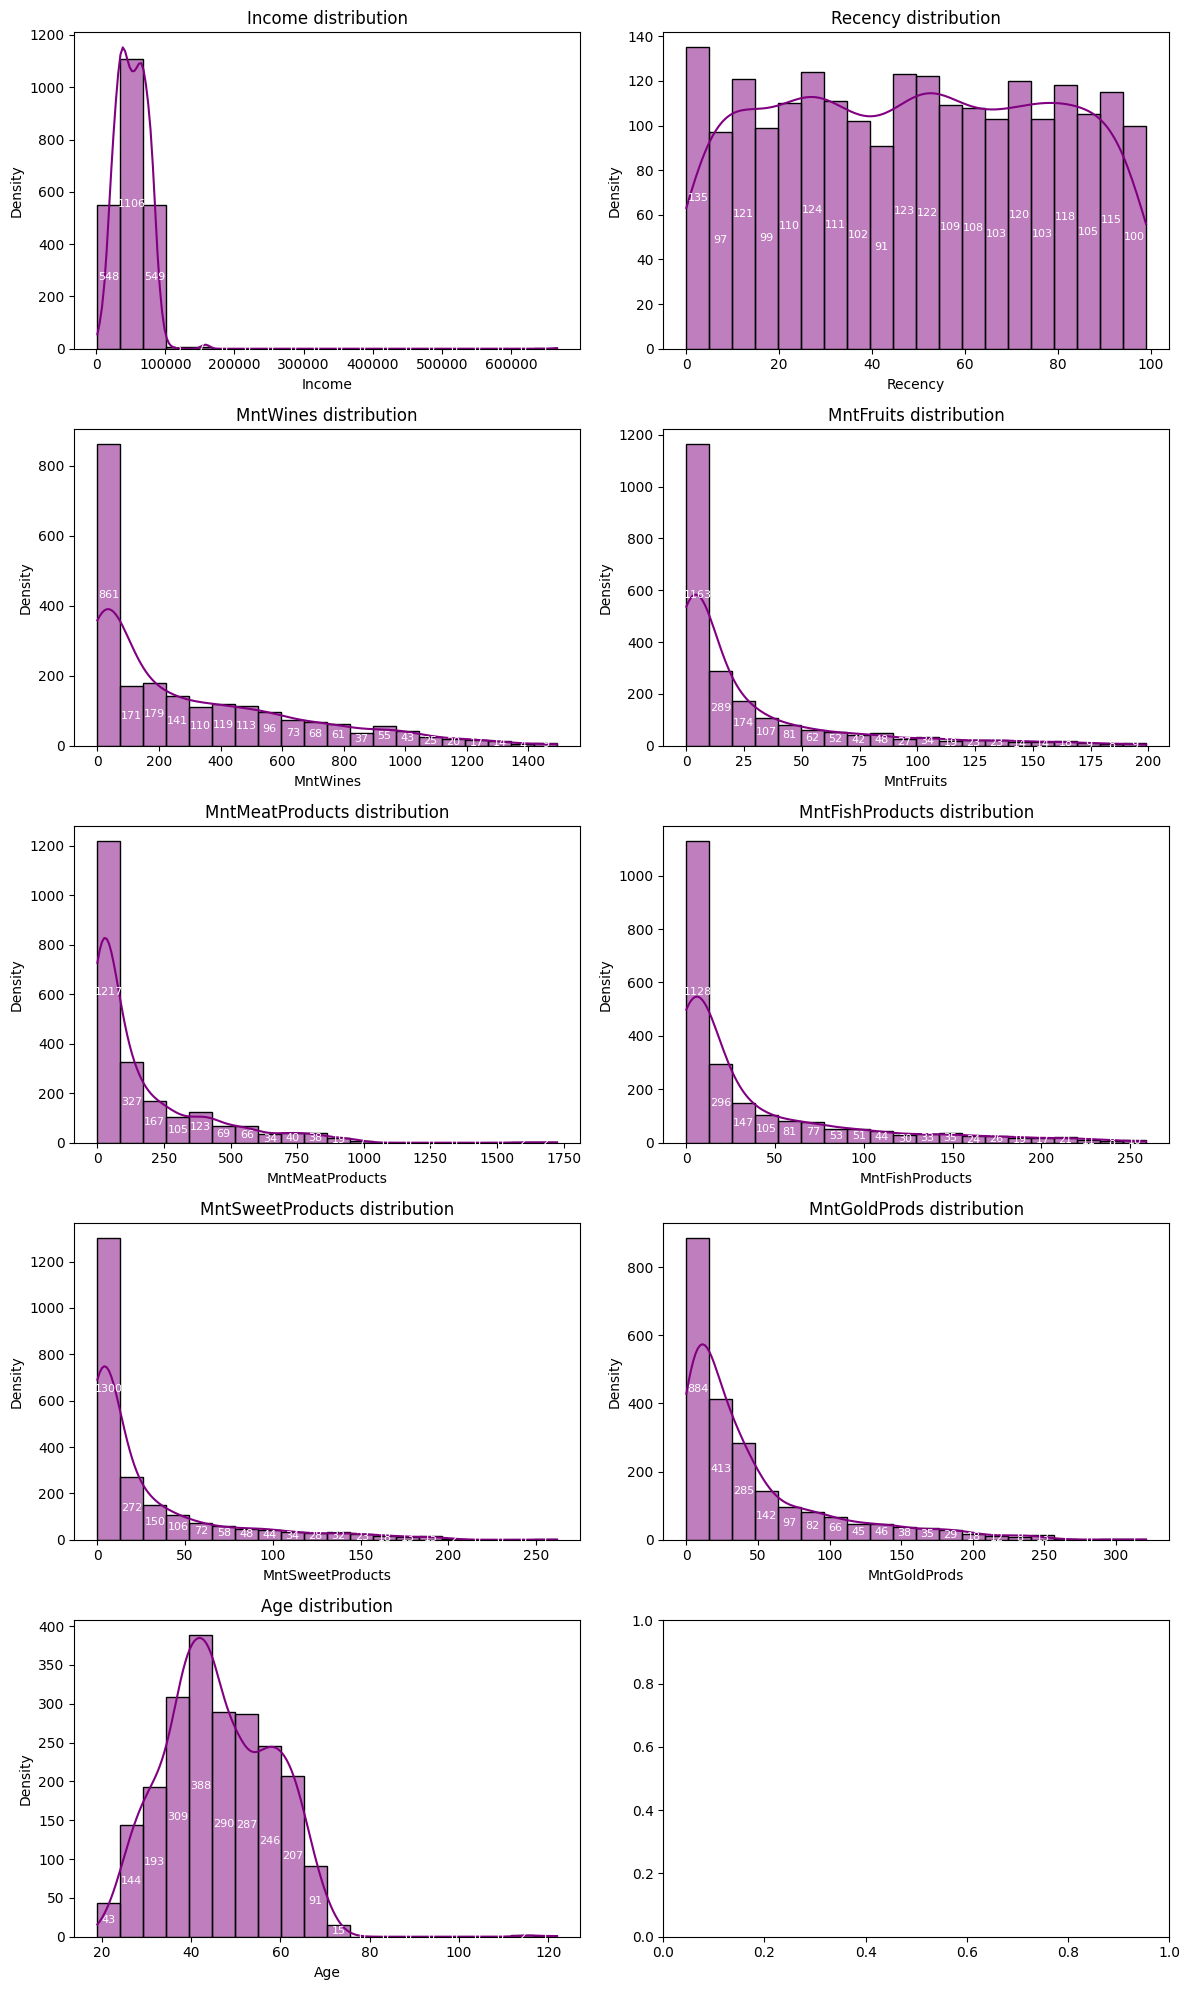

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the number of plots per row
plots_per_row = 2

# Calculate the number of rows required
num_rows = len(continuous) // plots_per_row
if len(continuous) % plots_per_row != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, 4 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each continuous feature
for i, column in enumerate(continuous):
    ax = axes[i]
    
    # Plot KDE plot
    sns.histplot(df[column], kde=True, color='purple', bins=20, fill=True, ax=ax)
    
    # Add counts values to each bar
    for p, value in zip(ax.patches, df[column].value_counts().sort_index().index):
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center', fontsize=8, color='white')

    # Set labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.set_title(f'{column} distribution')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


Next, we'll generate box plots for each continuous feature, segmented by each discrete feature. 

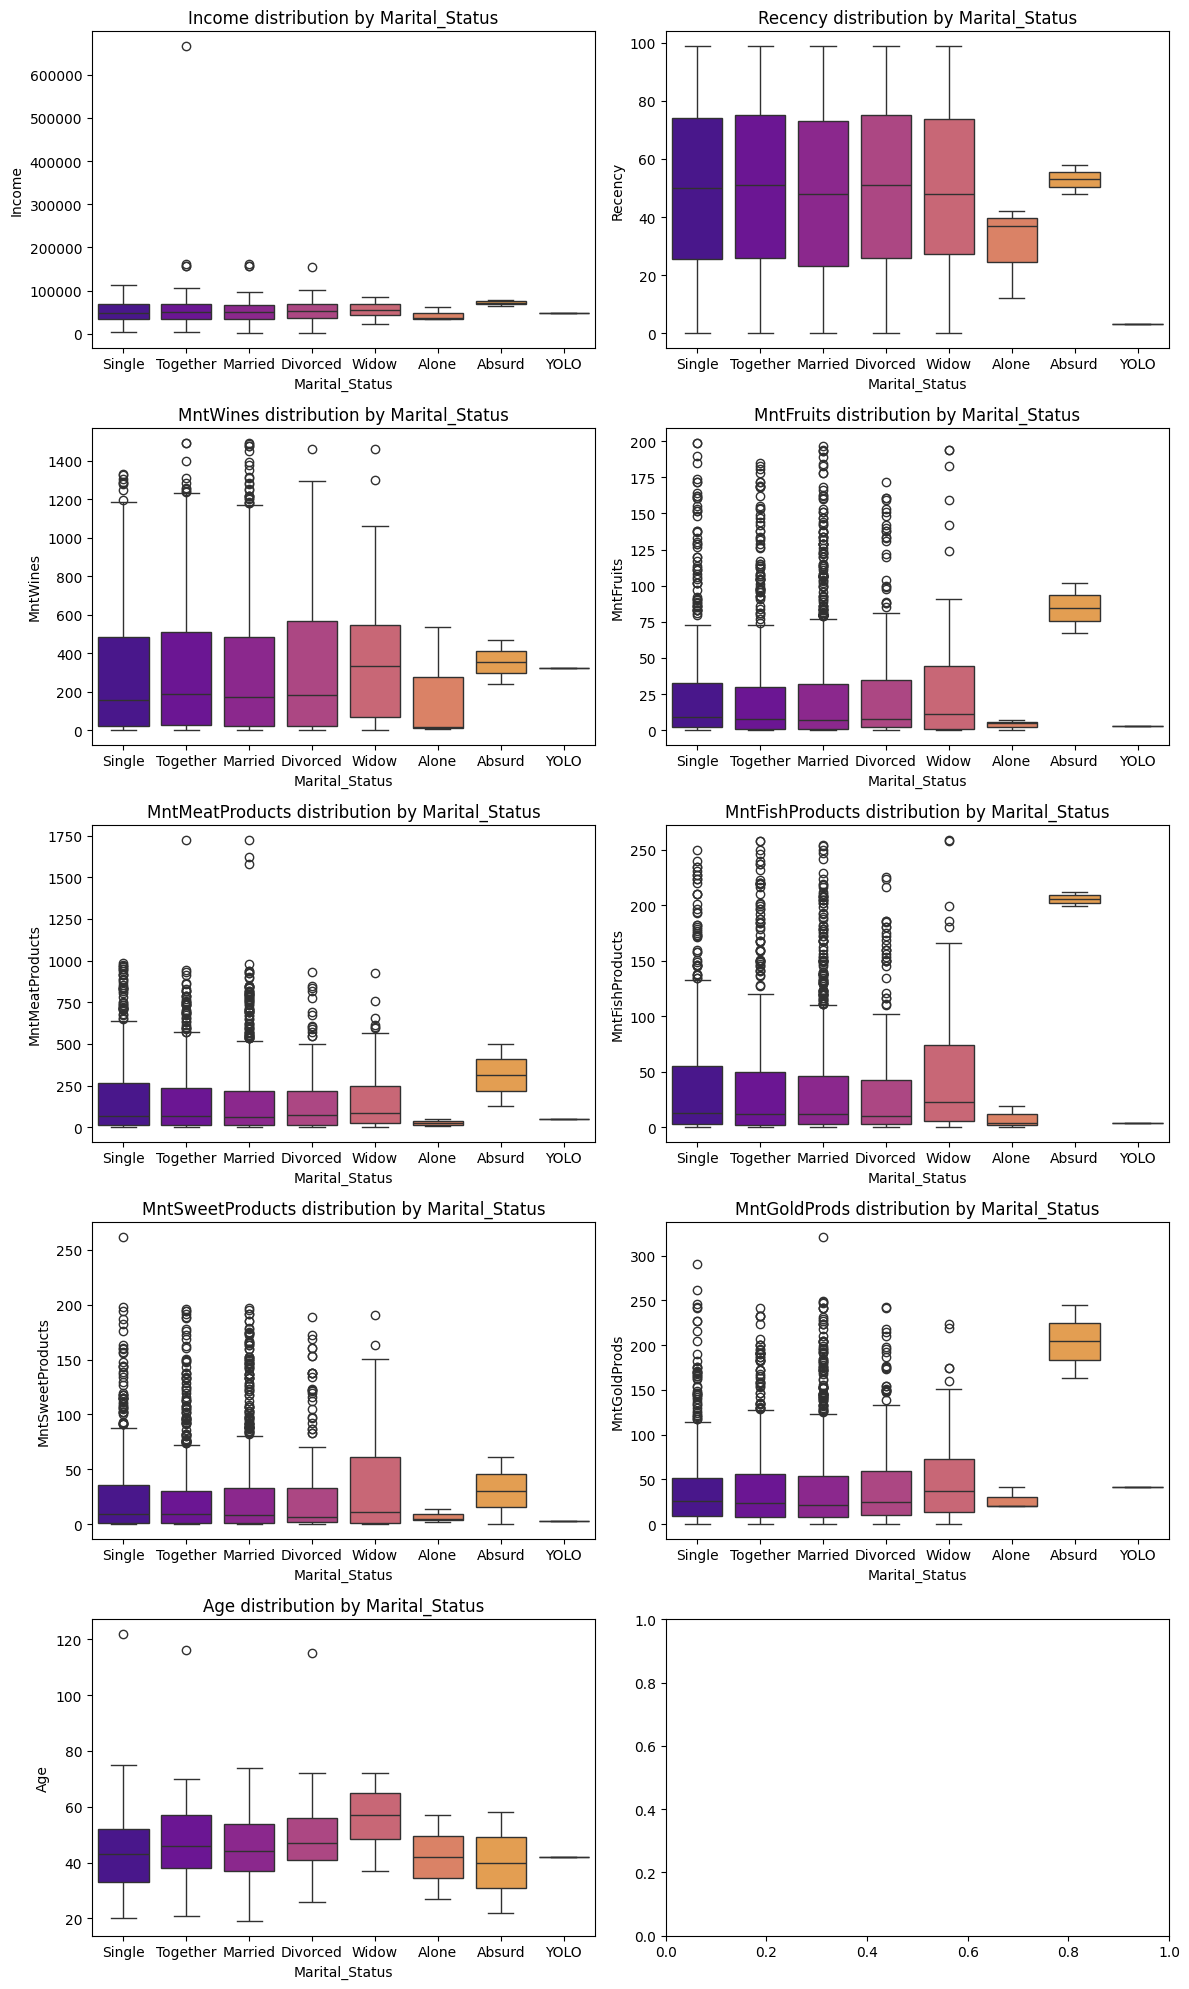

In [379]:
# Boxplots segmented by Marital_Status
warnings.filterwarnings("ignore", category=FutureWarning)

discrete_column = 'Marital_Status'  # Replace with the actual column name

# Define the number of plots per row
plots_per_row = 2

# Calculate the number of rows required
num_rows = len(continuous) // plots_per_row
if len(continuous) % plots_per_row != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, 4 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each continuous feature segmented by 'Marital_Status'
for i, column in enumerate(continuous):
    ax = axes[i]
    
    # Plot boxplot
    sns.boxplot(x=discrete_column, y=column, data=df, ax=ax, palette='plasma')
    
    # Set labels and title
    ax.set_xlabel(discrete_column)
    ax.set_ylabel(column)
    ax.set_title(f'{column} distribution by {discrete_column}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


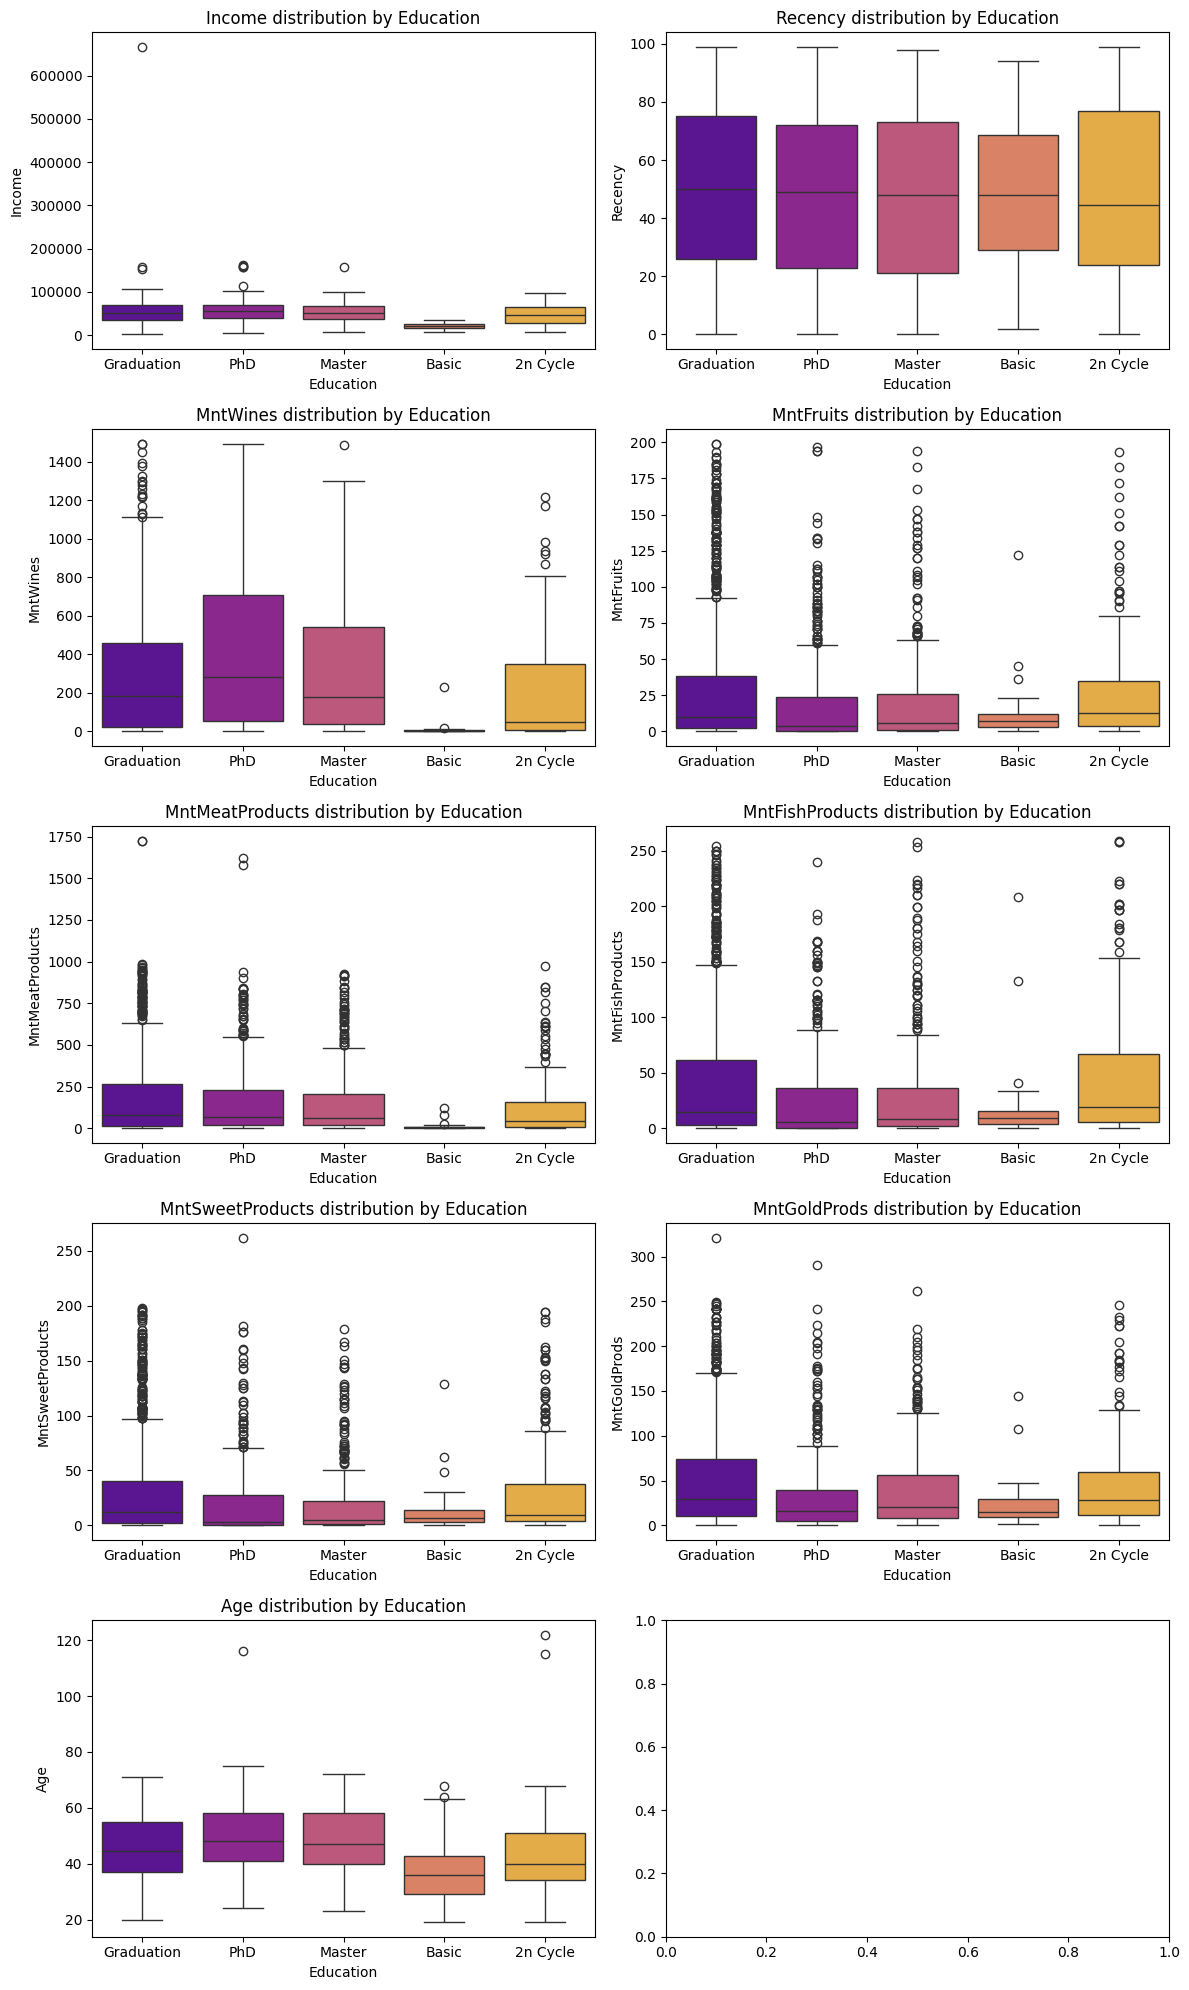

In [380]:
# Boxplots segmented by Education
warnings.filterwarnings("ignore", category=FutureWarning)

discrete_column = 'Education'  # Replace with the actual column name

# Define the number of row
plots_per_row = 2

# Calculate the number of rows required
num_rows = len(continuous) // plots_per_row
if len(continuous) % plots_per_row != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, 4 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each continuous feature
for i, column in enumerate(continuous):
    ax = axes[i]
    
    # Plot boxplot
    sns.boxplot(x=discrete_column, y=column, data=df, ax=ax, palette='plasma')
    
    # Set labels and title
    ax.set_xlabel(discrete_column)
    ax.set_ylabel(column)
    ax.set_title(f'{column} distribution by {discrete_column}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


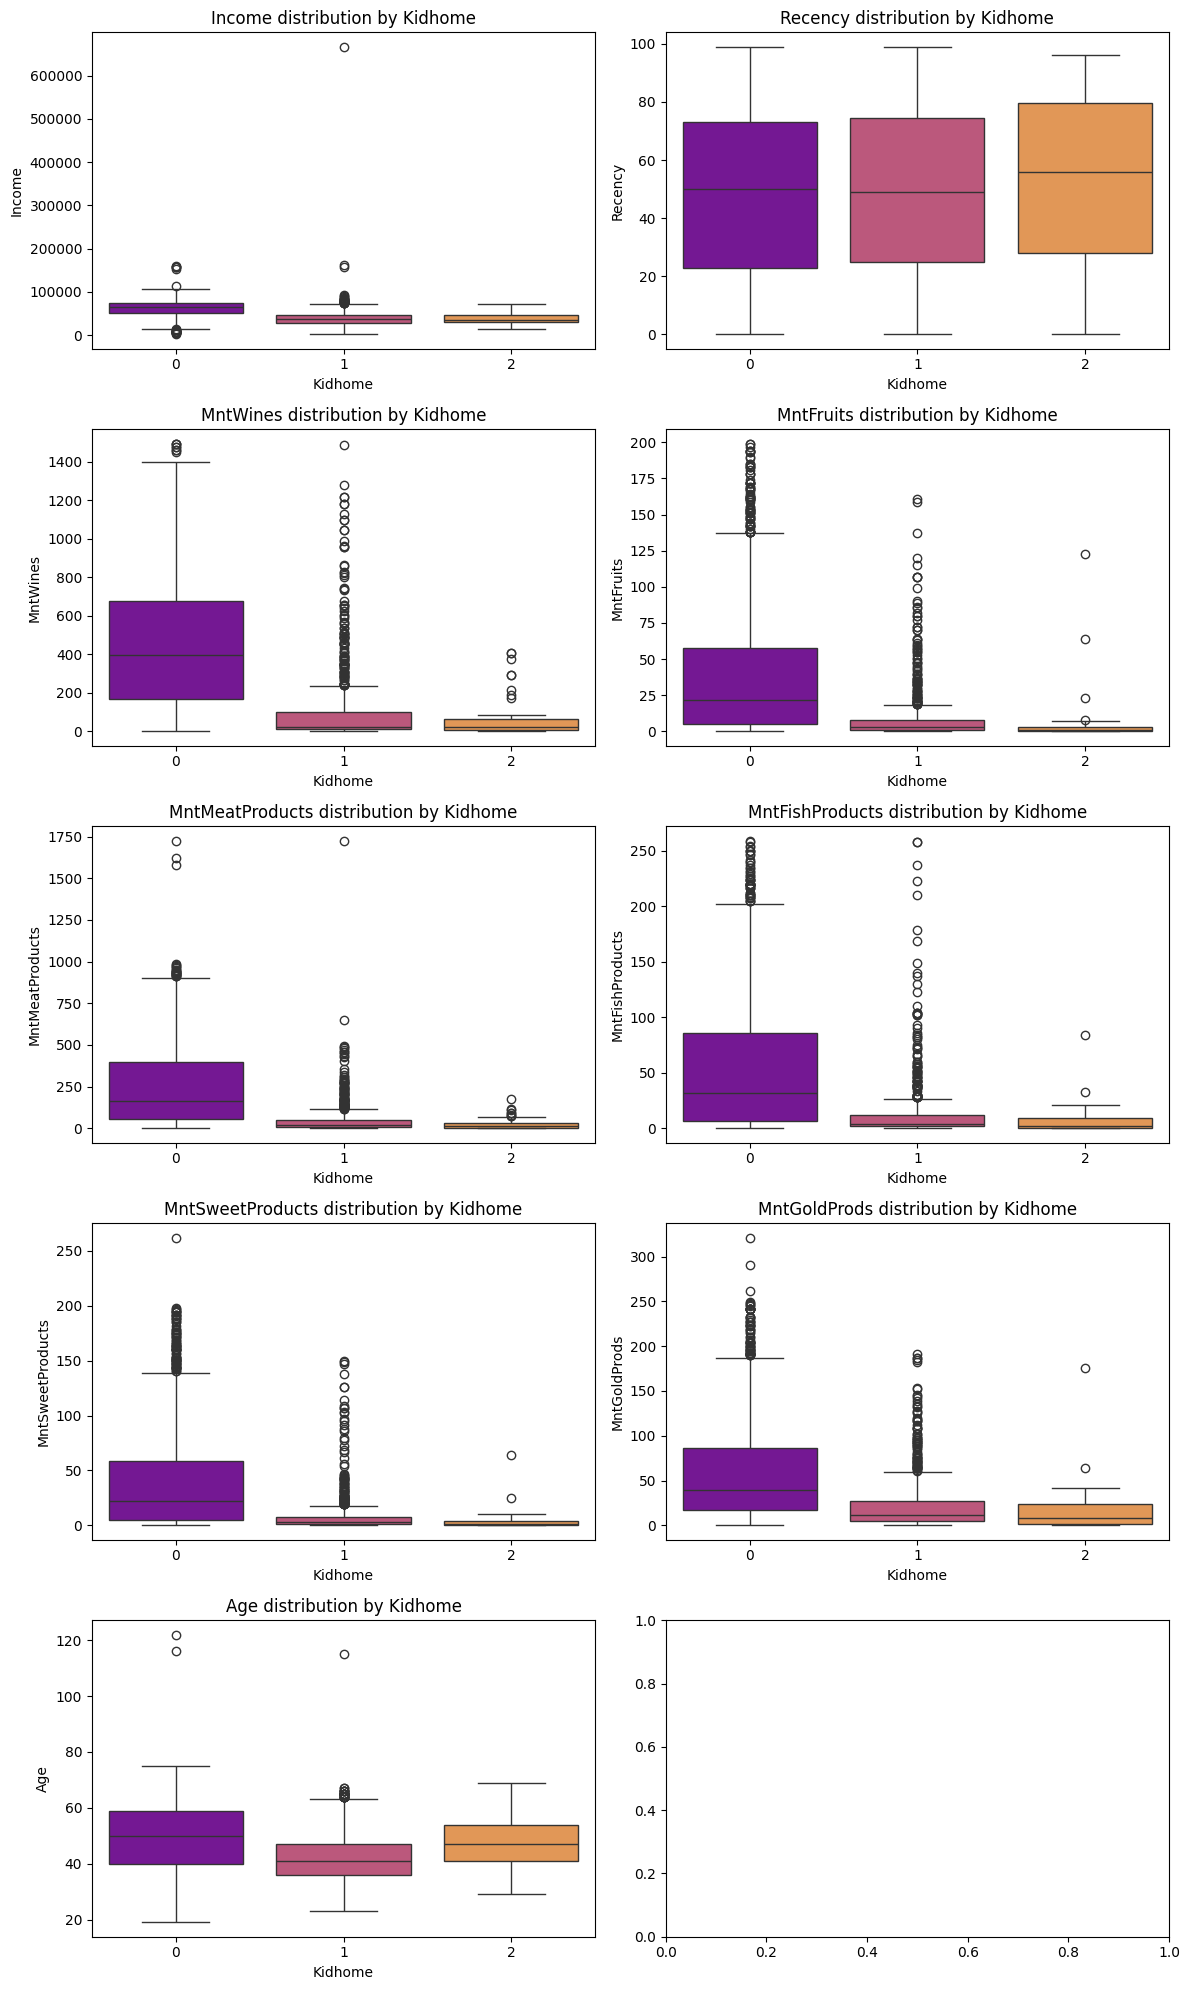

In [381]:
# Boxplots segmented by Kidhome
warnings.filterwarnings("ignore", category=FutureWarning)

discrete_column = 'Kidhome'  # Replace with the actual column name

# Define the number of row
plots_per_row = 2

# Calculate the number of rows required
num_rows = len(continuous) // plots_per_row
if len(continuous) % plots_per_row != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, 4 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each continuous feature
for i, column in enumerate(continuous):
    ax = axes[i]
    
    # Plot boxplot
    sns.boxplot(x=discrete_column, y=column, data=df, ax=ax, palette='plasma')
    
    # Set labels and title
    ax.set_xlabel(discrete_column)
    ax.set_ylabel(column)
    ax.set_title(f'{column} distribution by {discrete_column}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


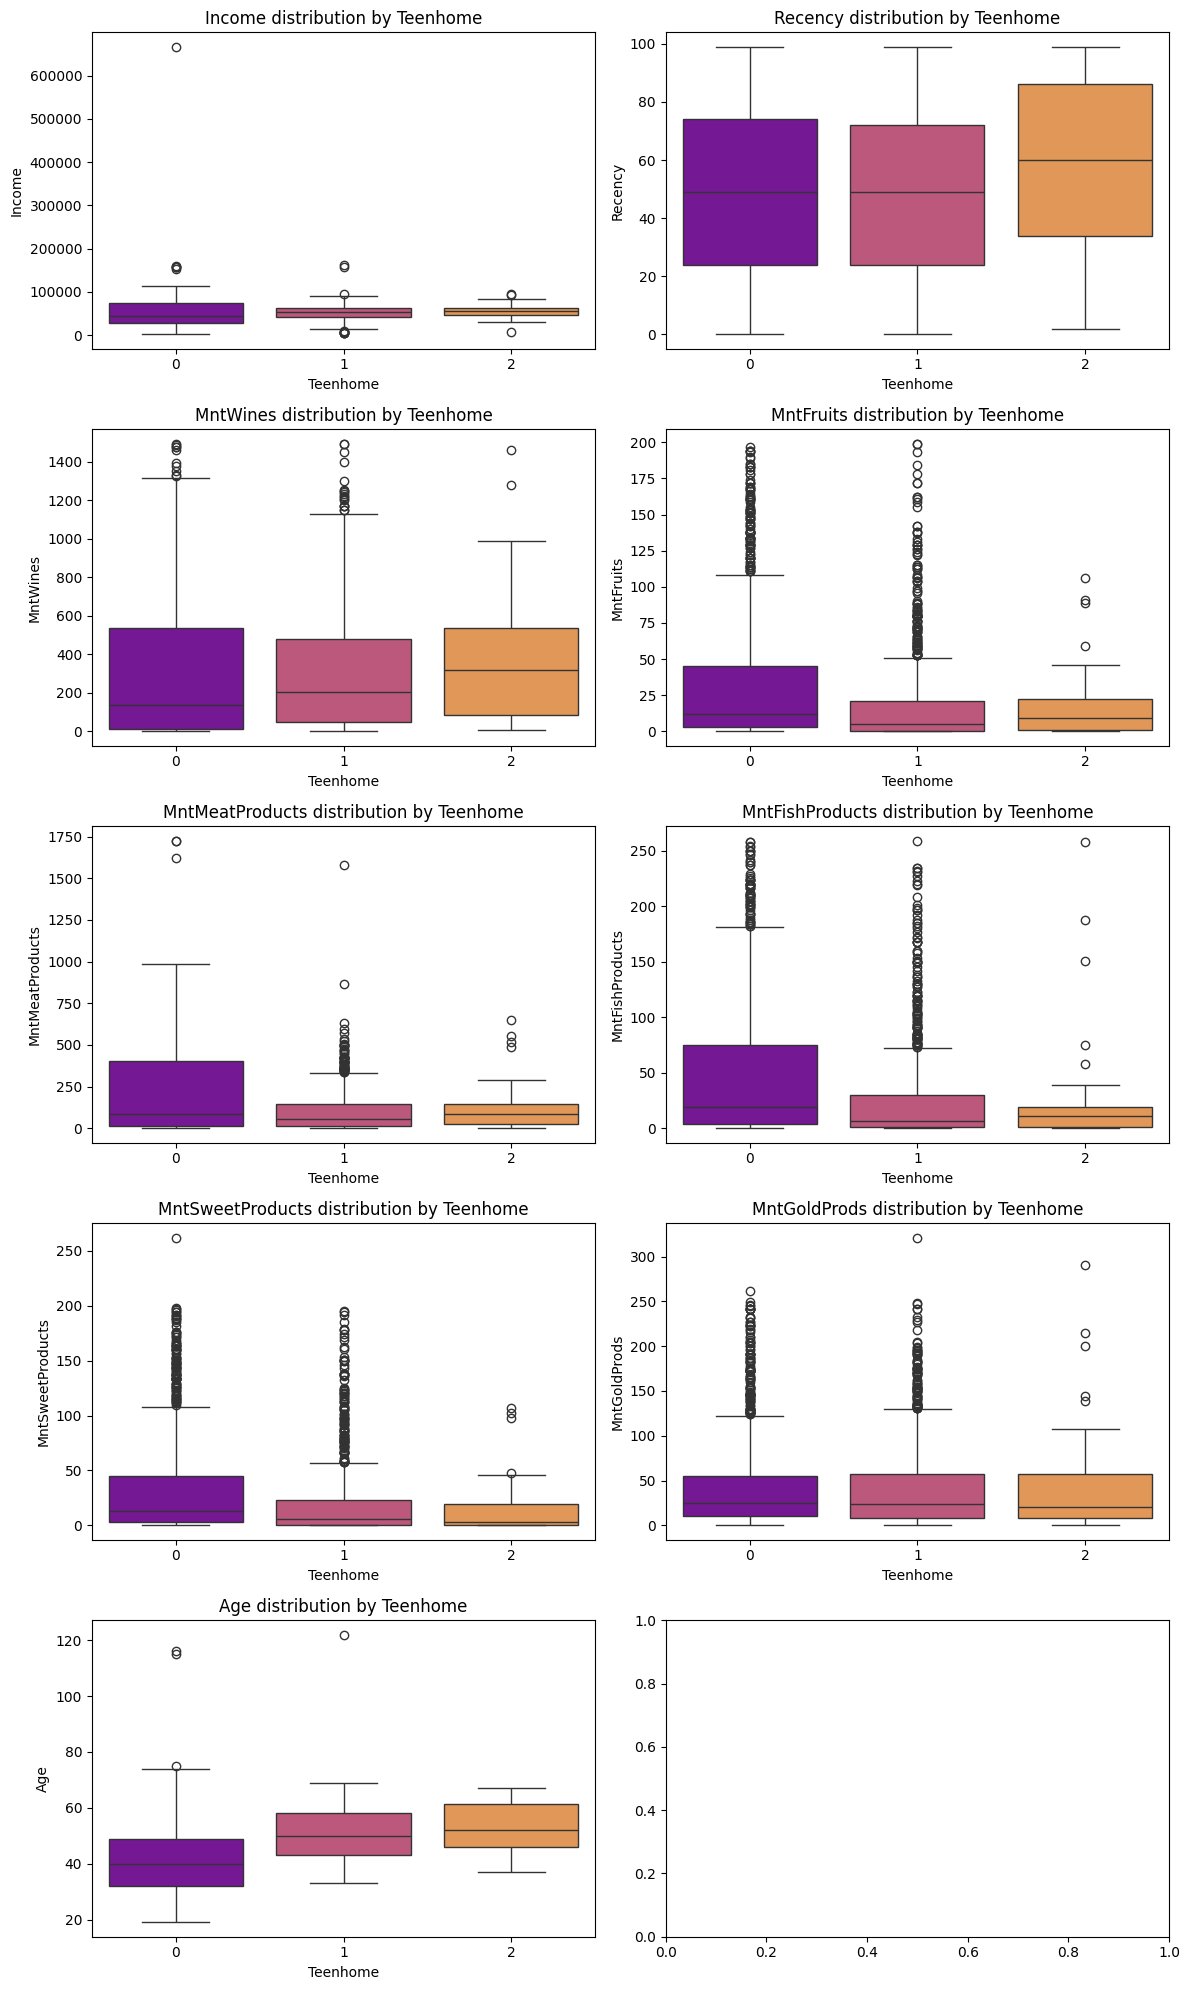

In [382]:
# Boxplots segmented by Teenhome
warnings.filterwarnings("ignore", category=FutureWarning)

discrete_column = 'Teenhome'  # Replace with the actual column name

# Define the number of row
plots_per_row = 2

# Calculate the number of rows required
num_rows = len(continuous) // plots_per_row
if len(continuous) % plots_per_row != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, 4 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each continuous feature
for i, column in enumerate(continuous):
    ax = axes[i]
    
    # Plot boxplot
    sns.boxplot(x=discrete_column, y=column, data=df, ax=ax, palette='plasma')
    
    # Set labels and title
    ax.set_xlabel(discrete_column)
    ax.set_ylabel(column)
    ax.set_title(f'{column} distribution by {discrete_column}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


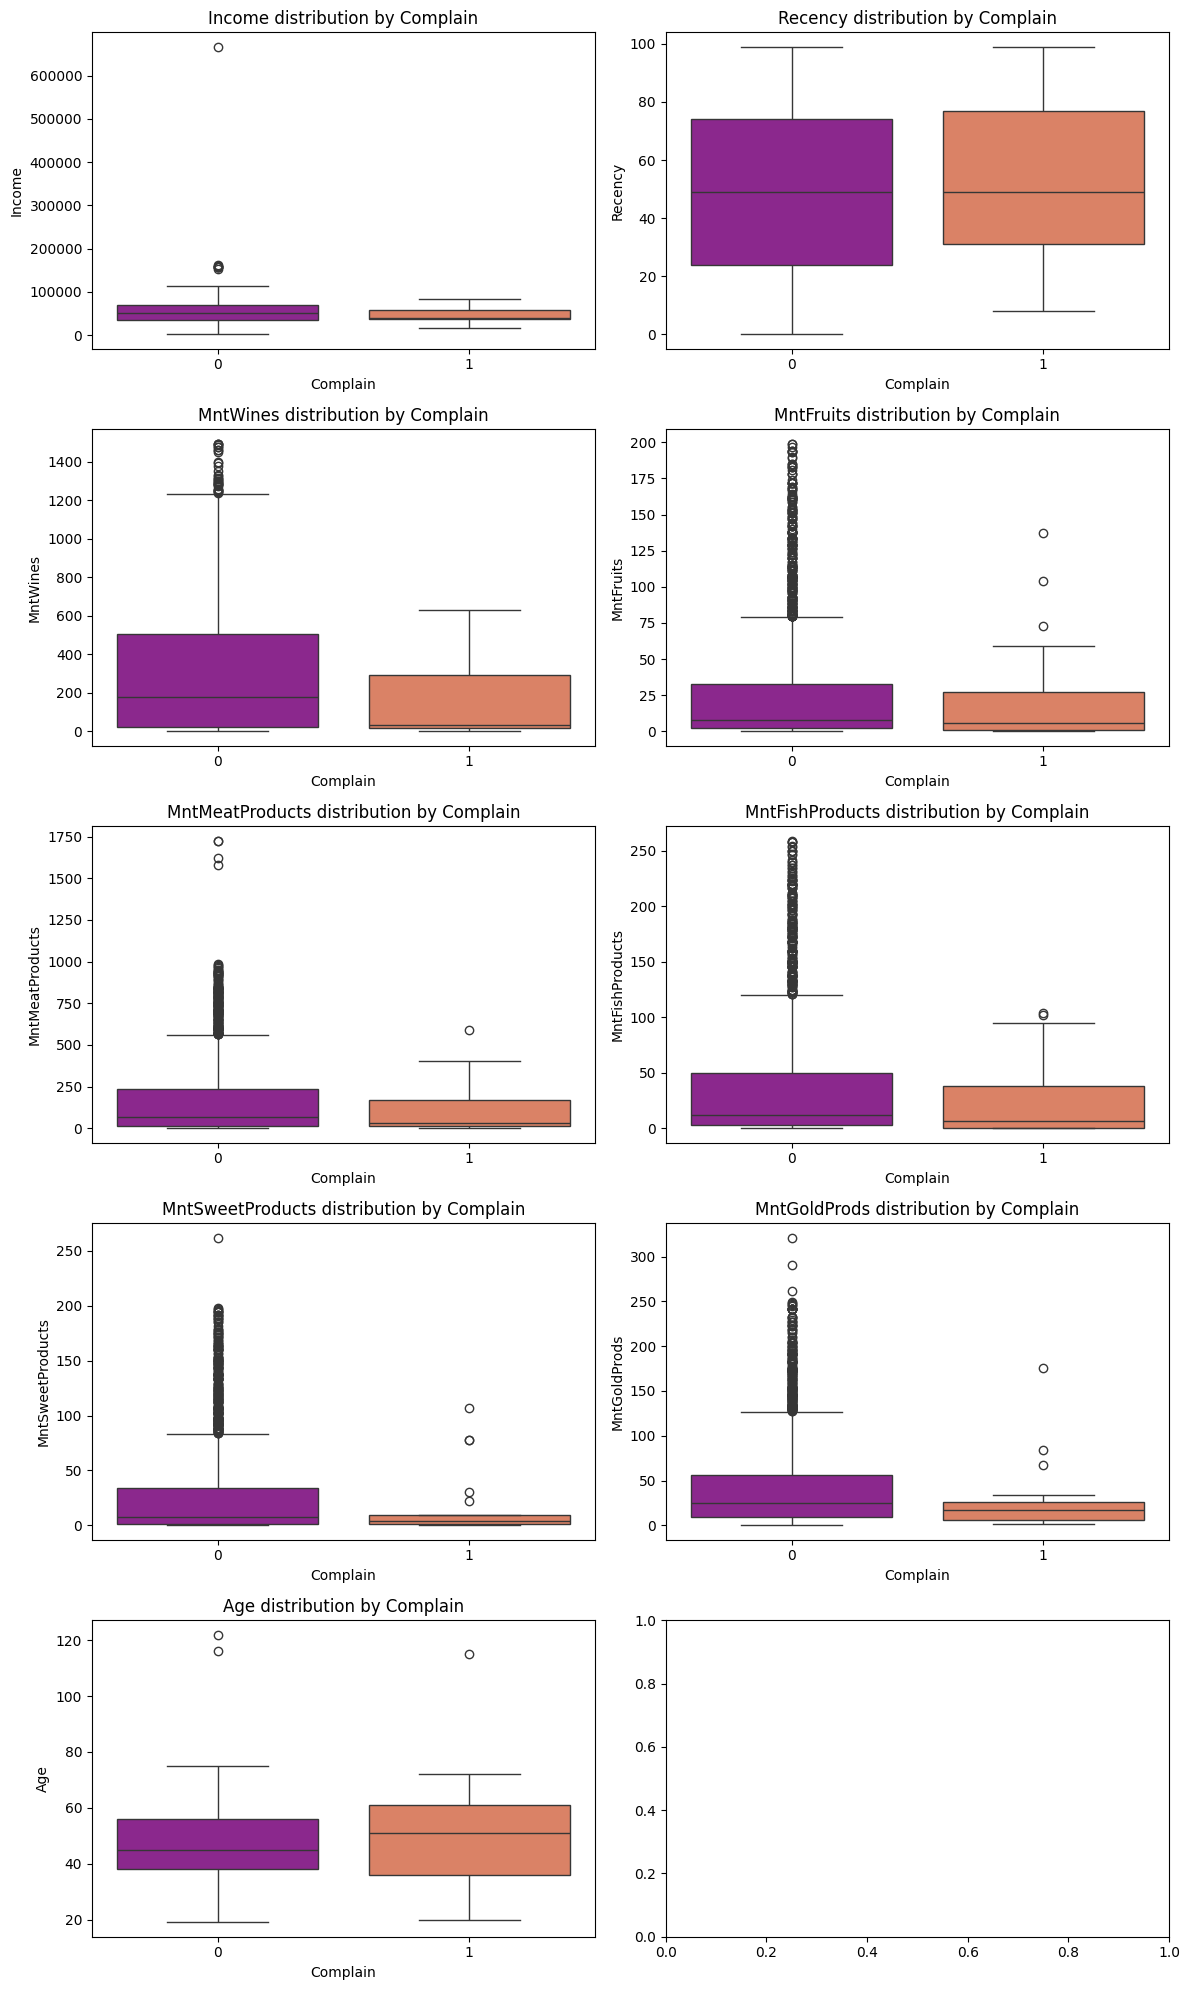

In [383]:
# Boxplots segmented by Complain
warnings.filterwarnings("ignore", category=FutureWarning)

discrete_column = 'Complain'  # Replace with the actual column name

# Define the number of row
plots_per_row = 2

# Calculate the number of rows required
num_rows = len(continuous) // plots_per_row
if len(continuous) % plots_per_row != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, 4 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each continuous feature
for i, column in enumerate(continuous):
    ax = axes[i]
    
    # Plot boxplot
    sns.boxplot(x=discrete_column, y=column, data=df, ax=ax, palette='plasma')
    
    # Set labels and title
    ax.set_xlabel(discrete_column)
    ax.set_ylabel(column)
    ax.set_title(f'{column} distribution by {discrete_column}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


### 1.3.2 Discrete Features

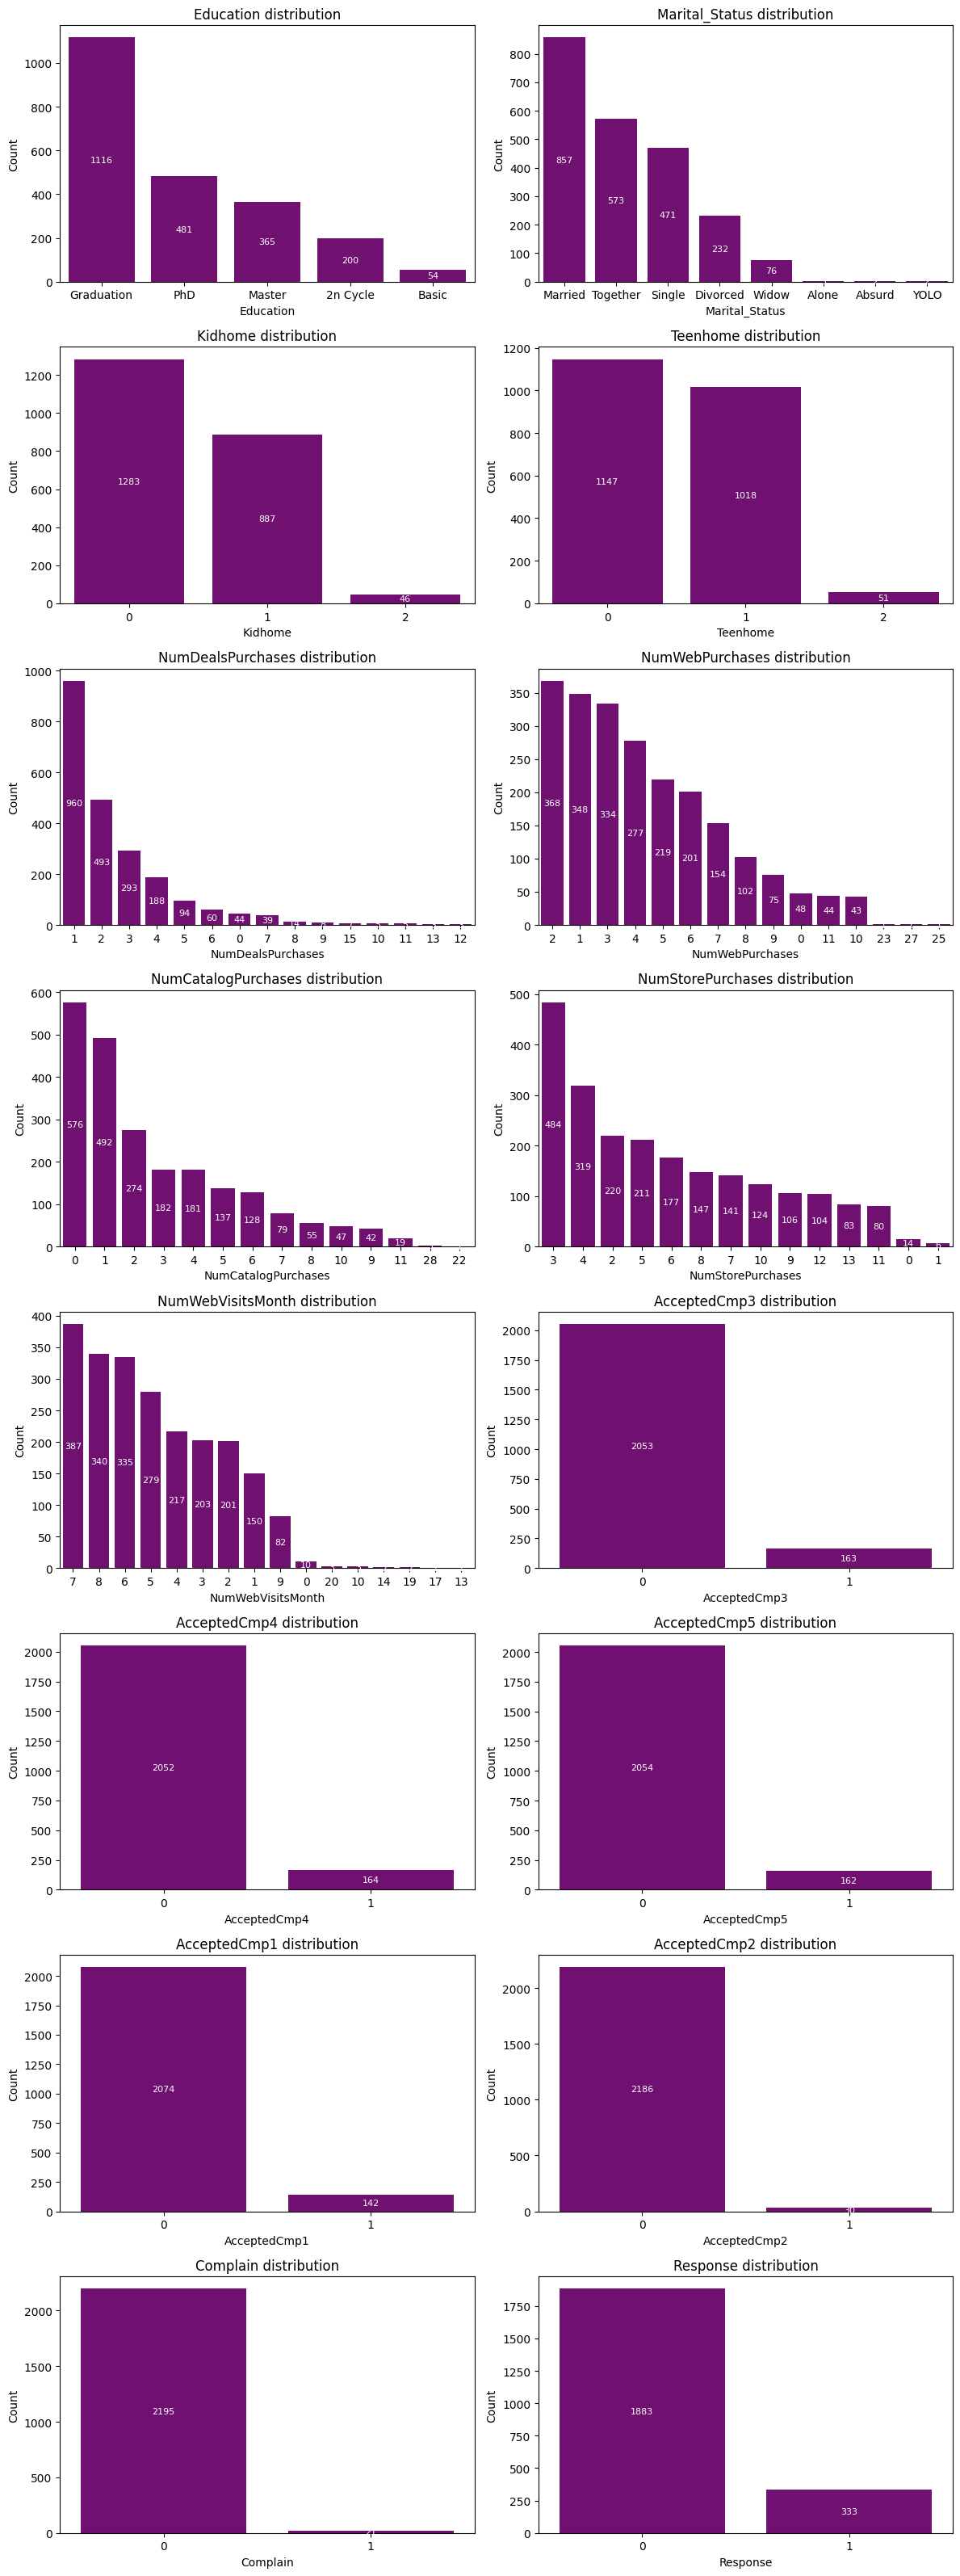

In [384]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of plots per row
plots_per_row = 2

# Calculate the number of rows required
num_rows = len(discrete) // plots_per_row
if len(discrete) % plots_per_row != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, 4 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each discrete feature with countplot using the default color palette
for i, column in enumerate(discrete):
    ax = axes[i]
    
    # Plot countplot with default color palette
    sns.countplot(x=column, data=df, ax=ax, order=df[column].value_counts().index, color='purple')
    
    # Add counts values to each bar
    for p, value in zip(ax.patches, df[column].value_counts().sort_index().index):
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center', fontsize=8, color='white')

    # Set labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'{column} distribution')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


<div style="background-color: #9370DB; color: #000000; padding: 10px;">
<span style="font-size: 28px;">What did we learn</span><br>
<blockquote>
<div style="background-color: #9370DB; color: #000000; padding: 10px;">
   <span style="font-size: 28px;">Histogram</span><br>
   <div style="background-color: #9370DB; color: #000000; padding: 10px;">
        - Income is mostly between 0 and 1000000<br>
        - As we found earlier, wines sell best with a mean of 303 followed by meat with 166<br>
        - Customer age is between 17 and 80<br>
        - Store purchase seem to be slightly more frequent that the other types<br>
        - The data indicates a noticeable trend: customers are showing a distinct preference 
        for purchasing wine and meat rather than the other product.
        We may need to dig into this and examine the results of the clustering to 
        identify which group is responsible for this disparity. We can hypothesize 
        that this store mostly sells meat and wine, or that a certain group of customers 
        particularly likes these two products.<br>
        </blockquote>
</blockquote>
<blockquote>
<div style="background-color: #9370DB; color: #000000; padding: 10px;">
   <span style="font-size: 28px;">Box-Plots</span><br>
   <div style="background-color: #9370DB; color: #000000; padding: 10px;">
        - There are outlier values for income and age, seem to be a typo<br>
        - Alone customer seem to buy less than other <br>
        - Customer buy more wine the more there education increase, may be related to increase in salary<br>
        - customer with kids spend way less on wine<br>
        </blockquote>
<blockquote>
<div style="background-color: #9370DB; color: #000000; padding: 10px;">
   <span style="font-size: 28px;">Counts-Plots</span><br>
   <div style="background-color: #9370DB; color: #000000; padding: 10px;">
        - More than 50% of customer do not have kid<br>
        - Almost no customer complained to the store<br>
        - Customer age is between 17 and 80<br>
        - Only 44 customer did not make a deal purchase, but most of them are focused on 1 purchase<br>
        - The data indicates a noticeable trend: customers are showing a distinct preference<br>
        
</blockquote>

# 3 Data prepocessing and Features engineering

In [385]:
df.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34


Feature engineering

In [386]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [387]:
# making Marital_Status binary 
df['Marital_Status'] = df['Marital_Status'].replace( # replace rather than rename to transform column value and not column name
    {   
        "Married": "Couple",
        "Together": "Couple",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone"
    })

#combining teen and kid as childhome
df['childhome'] = df[["Kidhome", "Teenhome"]].sum(axis=1)

#mixing childhome and Marital_status to just keep ppl number in household 
df['Family_Size'] = df['Marital_Status'].replace({"Alone": 1, "Couple": 2}) + df['childhome']

#renaming column we will keep for more clarity
df.rename(columns = {"MntWines" : "Wines", "MntMeatProducts" : "Meat"}, inplace=True)

#making Education simpler
df['Education'] = df['Education'].replace(
    {
        'Basic' : 'Undergraduate',
        '2n Cycle' : 'Undergraduate',
        'Graduation' : 'Graduate',
        'Master' :  'Postgraduate',
        'Phd' : 'Postgraduate'
    })

#combine all accepeted campaign and response since we don't care about specific
df['Campains-Accepted'] = df['AcceptedCmp1']+ df['AcceptedCmp2']+ df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5'] +df['Response']

In [388]:
#drop non useful column
df.drop(['Kidhome', 'Teenhome', 'Marital_Status', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Dt_Customer', 'childhome', 'Complain'], axis=1, inplace=True)

In [389]:
#transform education into numerical values
from sklearn.calibration import LabelEncoder

Categorical_features = ['Education']
le = LabelEncoder()
for i in Categorical_features:
    df[i] = df[[i]].apply(le.fit_transform) # double '[[]]' to get a dataframe with one column rather than a series object

In [390]:
df.head()

,Education,Income,Recency,Wines,Meat,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Family_Size,Campains-Accepted
0,0,58138.0,58,635,546,3,8,10,4,7,58,1,1
1,0,46344.0,38,11,6,2,1,1,2,5,61,3,0
2,0,71613.0,26,426,127,1,8,2,10,4,50,2,0
3,0,26646.0,26,11,20,2,2,0,4,6,31,3,0
4,1,58293.0,94,173,118,5,5,3,6,5,34,3,0


Remove Outlier

In [391]:
mask = ( df['Income'] <= 600000) & (df['Age'] <= 100) 
data = df[mask]

Features scaling

In [392]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
df_normalized = df.copy()  # Make a copy of the original DataFrame
df_normalized[df.columns] = min_max_scaler.fit_transform(df_normalized[df.columns])

# Standardization (Z-score Normalization)
standard_scaler = StandardScaler()
df_standardized = df.copy()  # Make a copy of the original DataFrame
df_standardized[df.columns] = standard_scaler.fit_transform(df_standardized[df.columns])


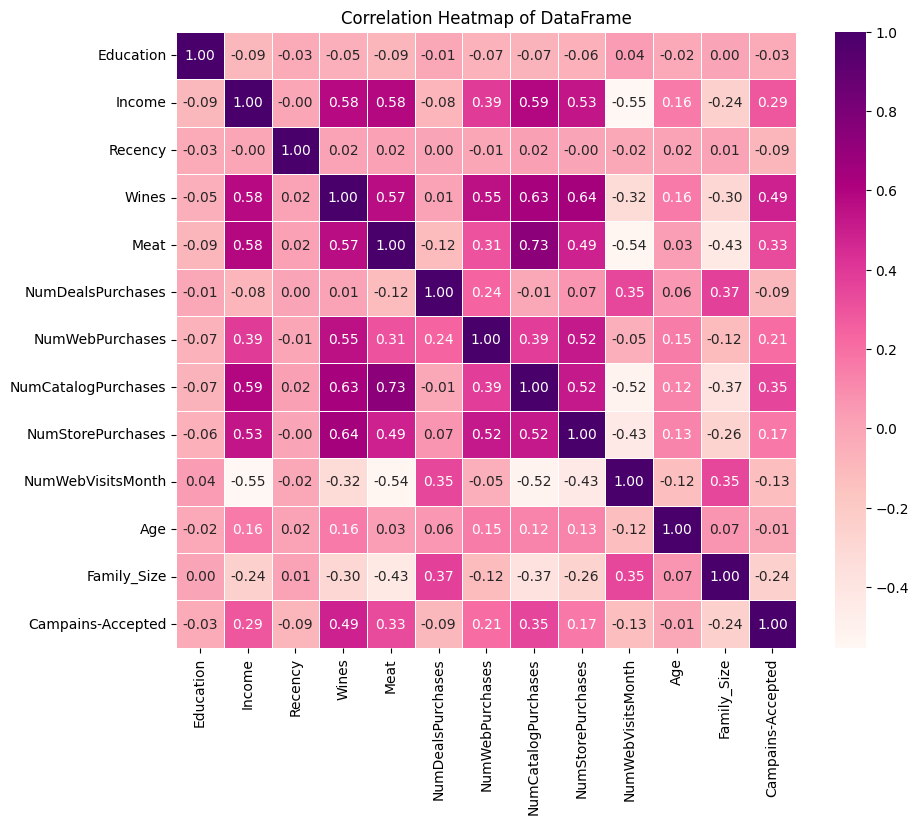

In [393]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of DataFrame')
plt.show()
